# Loading and visualizing datasets

Here we look at a few useful datasets.

We import key python and pytorch packages.

We have made dataloaders in the module "load_dataset" using pytorch tools. This will download MNIST, Digits and other datasets for you and make it into the dataset format to feed the neural network. 

In [18]:
import numpy as np  # to handle operations on arrays of numbers, similar to matlab
import matplotlib.pyplot as plt  # to plot figures
import matplotlib.cm as cm
import torch
import torch.nn as nn
import torch.optim
import sklearn as skl
import load_dataset as load  # home-made module with functions to load datasets

# MNIST dataset

MNIST is a widely used dataset for machine learning. It is composed of grayscale images of handwritten digits, each of 28-by-28 pixels. There are ten classes, for the digits 0 to 9.
Let's start by looking at the dataset.

Further work: For further understanding you can look into the load_dataset.py module.
It allows you to perform transformation on the images. For instance here we did a normalization operation that is typical for MNIST. 
Here is the list of transform functions given by Pytorch: https://pytorch.org/vision/stable/transforms.html. They can be combined together. For more complex tasks, it can be critical to have prepared the data in the correct way.

In [19]:
batch_size = 256  # the number of examples per batch
train_loader, test_loader, dim_in, dim_out = load.load_MNIST(batch_size=batch_size)

Let's display an example of image. You can change the index to look at different examples.

### TODO:
Look at different examples by modifying ex_index

The shape of the inputs is: torch.Size([28, 28]) => a pytorch tensor of dimensions (28, 28)
The class here is 5


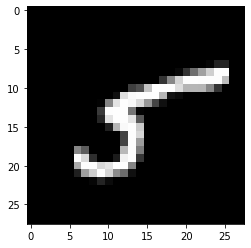

In [20]:
ex_index = ... # pick random index for the example
img = train_loader.dataset.data[ex_index]  # we take the DATA corresponding to this index
print(f'The shape of the inputs is: {img.shape} => a pytorch tensor of dimensions (28, 28)')
digit_class = train_loader.dataset.targets[ex_index]  # we take the TARGET class corresponding to this index
plt.imshow(img, cmap="gray")
print(f'The class here is {digit_class.numpy()}')

In [21]:
print(f'The number of train examples is {train_loader.dataset.targets.size()}')
print(f'The number of test examples is {test_loader.dataset.targets.size()}')

The number of train examples is torch.Size([60000])
The number of test examples is torch.Size([10000])


# Digits dataset

This dataset is an offspin from MNIST. The images are smaller: 8 by 8 pixels. So this dataset will make your simulations faster. It is also easier to solve as you can get an almost perfect score with just a perceptron.

https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset for more info.

Note that the input is a vector and not an array.

In our homemade loader, we chose to put 3/4 of the dataset in the train and 1/4 in the test.

In [22]:
batch_size = 100  # the number of examples per batch
train_loader, test_loader, dim_in, dim_out = load.load_digits(batch_size=batch_size)

### TODO:
Look at different examples by modifying ex_index

The shape of the inputs is: torch.Size([64]), so we need to reshape it to make an image
The class here is 4


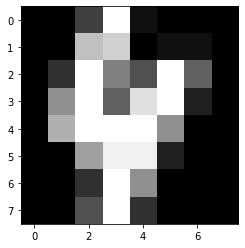

In [23]:
ex_index = 3 # pick random index for the example
sample = train_loader.dataset.data[ex_index]  # we take the DATA corresponding to this index
print(f'The shape of the inputs is: {sample.shape}, so we need to reshape it to make an image')
digit_class = train_loader.dataset.targets[ex_index]  # we take the TARGET class corresponding to this index
plt.imshow(sample.reshape((8,8)), cmap="gray")
print(f'The class here is {digit_class.numpy()}')

In [24]:
print(f'The number of train examples is {train_loader.dataset.targets.size()}')
print(f'The number of test examples is {test_loader.dataset.targets.size()}')

The number of train examples is torch.Size([1347])
The number of test examples is torch.Size([450])


## Fashion-MNIST

Fashion-MNIST is composed of images the same size as MNIST. Each image represents an item of clothing.

In [28]:
dic = {'0': 'T-shirt/top',
'1':'Trouser',
'2' :'Pullover',
'3' :'Dress',
'4' :'Coat',
'5' :'Sandal',
'6' :'Shirt',
'7' :'Sneaker',
'8' :'Bag',
'9' :'Ankle boot'}

In [25]:
batch_size = 256  # the number of examples per batch
train_loader, test_loader, dim_in, dim_out = load.load_FashionMNIST(batch_size=batch_size)

The shape of the inputs is: torch.Size([28, 28]) => a pytorch tensor of dimensions (28, 28)
The class here is Trouser


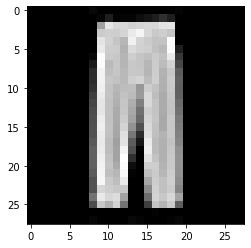

In [31]:
ex_index = 21 # pick random index for the example
img = train_loader.dataset.data[ex_index]  # we take the DATA corresponding to this index
print(f'The shape of the inputs is: {img.shape} => a pytorch tensor of dimensions (28, 28)')
item_class = train_loader.dataset.targets[ex_index]  # we take the TARGET class corresponding to this index
plt.imshow(img, cmap="gray")
cloth = dic[f'{item_class.numpy()}']
print(f'The class here is {cloth}')

In [32]:
print(f'The number of train examples is {train_loader.dataset.targets.size()}')
print(f'The number of test examples is {test_loader.dataset.targets.size()}')

The number of train examples is torch.Size([60000])
The number of test examples is torch.Size([10000])


# Circles and moons datasets

These two datasets have lower dimension than MNIST and digits. They only have two inputs and two outputs. The advantages of this are:
- You can plot them on a 2D map and really see what is going on
- The simulations are faster to run

Despite their small size, these tasks are not trivial. Contrary to the handwritten digits, they are strongly non-linear. Which means the accuracy with a simple perceptron will be low.

## Circles

Play with the parameters to change the look of the dataset.

In [33]:
batch_size = 100  # the number of examples per batch
train_loader, test_loader, dim_in, dim_out = load.load_circles(batch_size=batch_size, 
                                                               n_samples=1000, shuffle=True, 
                                                               noise=0.1, random_state=None, factor=0.5)

Input shape is torch.Size([750, 2])
Target shape is torch.Size([750])


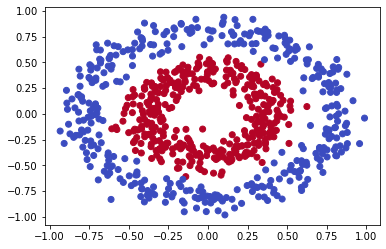

In [34]:
X = train_loader.dataset.data  # we take the DATA (here all dataset)
y = train_loader.dataset.targets  # we take the TARGET (here all dataset)
print(f'Input shape is {X.shape}')
print(f'Target shape is {y.shape}')
ax = plt.subplot()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)

## Moons

In [35]:
batch_size = 100  # the number of examples per batch
train_loader, test_loader, dim_in, dim_out = load.load_moons(batch_size=batch_size, 
                                                               n_samples=1000, shuffle=True, 
                                                               noise=0.2, random_state=None)

Input shape is torch.Size([750, 2])
Target shape is torch.Size([750])


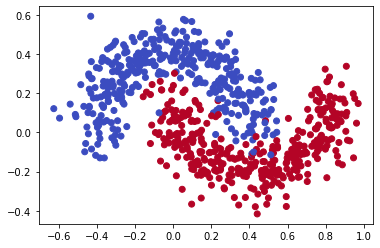

In [36]:
X = train_loader.dataset.data  # we take the DATA (here all dataset)
y = train_loader.dataset.targets  # we take the TARGET (here all dataset)
print(f'Input shape is {X.shape}')
print(f'Target shape is {y.shape}')
ax = plt.subplot()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm)